Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4

## Assignment

- [ ] Watch Aaron Gallant's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your coefficients.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.


## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [ ] Make exploratory visualizations.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from the previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```

#### Pipelines

[Scikit-Learn User Guide](https://scikit-learn.org/stable/modules/compose.html) explains why pipelines are useful, and demonstrates how to use them:

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:
> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

### Reading
- [ ] [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
- [ ] [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)
- [ ] [Statistical Modeling: The Two Cultures](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).



In [2]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module4')

     |████████████████████████████████| 92kB 5.5MB/s 
     |████████████████████████████████| 133kB 16.1MB/s 
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
     |████████████████████████████████| 614kB 40.1MB/s 
     |████████████████████████████████| 225kB 11.9MB/s 
     |████████████████████████████████| 768kB 41.4MB/s 
     |████████████████████████████████| 194kB 44.9MB/s 
     |████████████████████████████████| 51kB 21.7MB/s 
     |████████████████████████████████| 737kB 35.5MB/s 
     |████████████████████████████████| 51kB 20.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=9ca624a943f14da0d8d29457fe5ed1d917303ad86afda427ba5bde30cad7c9bf
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=5e93711bff3588364630ec8aa4ee919323353b9c

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd

train_features = pd.read_csv('../data/tanzania/train_features.csv')
train_labels = pd.read_csv('../data/tanzania/train_labels.csv')
test_features = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

###Do train/validate/test split with the Tanzania Waterpumps data.

In [5]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


##Baseline Model 
A baseline for classification can be the most common class in the training dataset. logistic regression predicts the probablity of an event occuring

In [6]:
y_train= train_labels['status_group']
# determine the majority class 
(y_train.value_counts(normalize= True)*100).round(2)

functional                 54.31
non functional             38.42
functional needs repair     7.27
Name: status_group, dtype: float64

Baseline prediction = 54.31

In [7]:
# accuray for the classification is frequency of the most common labels
# check how accurate model is
# guess this mojority class for every prediction
majority_class= y_train.mode()[0]
y_pred= [majority_class]*len(y_train)
print(len(y_pred))


59400


In [8]:
#Accuracy of majority class baseline = frequency of the majority class
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.543080808080808

In [9]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [10]:
X_train = train_features
X_train.shape , y_train.shape

((59400, 40), (59400,))

In [11]:
X_test= test_features
sample_submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional


In [12]:
y_test = sample_submission['status_group']
X_test.shape, y_test.shape

((14358, 40), (14358,))

In [0]:
# standarize the data

In [14]:
# split the data into train and validate data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify= y_train, test_size=0.2, random_state= 44 )
X_train.shape , X_val.shape , y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

###Use scikit-learn for logistic regression.

In [15]:
# drop the non numeric feature
X_train_numeric= X_train.select_dtypes('number')
print(X_train_numeric.shape)
print(y_train.shape)
X_train_numeric.head() 

(47520, 10)
(47520,)


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
47538,598,0.0,0,36.533101,-6.383296e+00,0,1,1,0,0
30536,51326,0.0,1154,36.939668,-3.359691e+00,0,2,7,140,2002
39827,42276,2500.0,1599,34.748424,-8.914542e+00,0,11,4,35,2010
19334,35669,0.0,0,0.000000,-2.000000e-08,0,19,2,0,0
17894,9127,0.0,24,39.298229,-6.982862e+00,0,60,43,6922,2010


In [16]:
# Look for nan
X_train_numeric.isna().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegressionCV
# Instantiate it
model= LogisticRegressionCV(solver= 'lbfgs', multi_class= 'auto', n_jobs= -1,max_iter= 1000)
# Fit it
model.fit(X_train_numeric, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [18]:
import sklearn
sklearn.__version__

'0.21.3'

###Get your validation accuracy score.

In [19]:
# evaluate on validation data
X_val_numeric = X_val.select_dtypes('number')
y_pred= model.predict(X_val_numeric)
acc= accuracy_score(y_val, y_pred)
print(f'Accuracy score for just numeric feature: {acc: .2f}')
# didn't beat the baseline prediction

Accuracy score for just numeric feature:  0.55


In [20]:
X_train.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2922
gps_height                   0
installer                 2941
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 300
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2625
recorded_by                  0
scheme_management         3138
scheme_name              22594
permit                    2456
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

###Simple and fast Baseline Model with subset of columns

In [0]:
# Just numeric value with no missing columns
train_subset= X_train.select_dtypes('number').dropna(axis=1)

###Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)

In [22]:
# check the cardinality of data
X_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44895,2,True,40843
permit,45064,2,True,31052
source_class,47520,3,groundwater,36574
management_group,47520,5,user-group,41969
quantity_group,47520,5,enough,26523
quantity,47520,5,enough,26523
waterpoint_type_group,47520,6,communal standpipe,27645
quality_group,47520,6,good,40614
payment_type,47520,7,never pay,20282


In [25]:
X_train['quantity'].value_counts()

enough          26523
insufficient    12064
dry              5017
seasonal         3295
unknown           621
Name: quantity, dtype: int64

In [31]:
#combine X_train and y_train for exploratory data visualisation
train = X_train.copy()
train['status_group']= y_train
train.groupby('quantity')['status_group'].value_counts(dropna = True, normalize=True)

quantity      status_group           
dry           non functional             0.968906
              functional                 0.024716
              functional needs repair    0.006378
enough        functional                 0.651962
              non functional             0.275723
              functional needs repair    0.072315
insufficient  functional                 0.524784
              non functional             0.379808
              functional needs repair    0.095408
seasonal      functional                 0.575721
              non functional             0.321093
              functional needs repair    0.103187
unknown       non functional             0.716586
              functional                 0.262480
              functional needs repair    0.020934
Name: status_group, dtype: float64

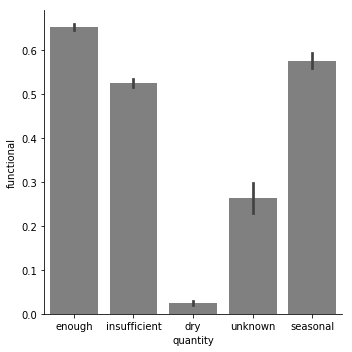

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
train['functional']= (train['status_group']== 'functional').astype(int)
train[['status_group' , 'functional']]
sns.catplot(x = 'quantity', y= 'functional', data = train, kind= 'bar', color= 'gray')

In [54]:
# one or so many unique value feature is not useful for model
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

# Use both numerical feature and categorical feature(quantify)

categorical_features= ['quantity']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
# combine the feature
features = categorical_features + numeric_features 

# create subset of numeric and categorical features
X_train_subset = X_train[features]
X_val_subset= X_val[features]

# do the hot encoding
encoder = ce.OneHotEncoder(use_cat_names = True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

#Standarize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

# Instantiate the model
model = LogisticRegressionCV(multi_class = 'auto', n_jobs = -1,  )

# fit the model
model.fit(X_train_scaled, y_train)

# Print the accuracy output
print(f'validation score:{model.score(X_val_scaled, y_val):.2f}')




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


validation score:0.65


###Get and plot your coefficients.

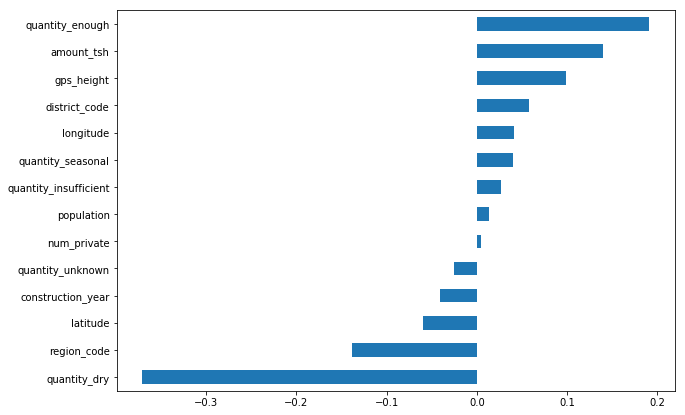

In [65]:
# we have coefficient for each variable(column)
# model.coef[0] for the 0th class functional
#model.coef[1] for the 1st class needs to repair
coefficient= pd.Series(model.coef_[0], X_train_encoded.columns)
plt.figure(figsize= (10,7))
coefficient.sort_values().plot.barh();
